In [98]:
import pandas as pd
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Get Data Train 

In [99]:
df = pd.read_csv("dataset/kendaraan_train_clean.csv")
df_test = pd.read_csv("dataset/kendaraan_test_clean.csv")

## Check Categorical di kolom tertarik

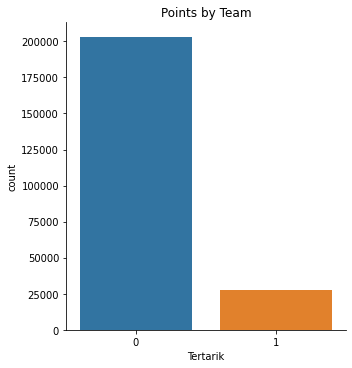

In [100]:
sns.catplot(x='Tertarik', data=df, kind='count').set(title='Data Train')


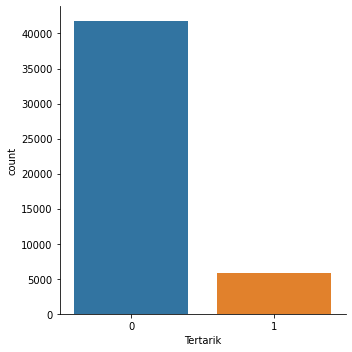

In [101]:
sns.catplot(x='Tertarik', data=df_test, kind='count').set(title='Data Test')

## Feature Selection

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

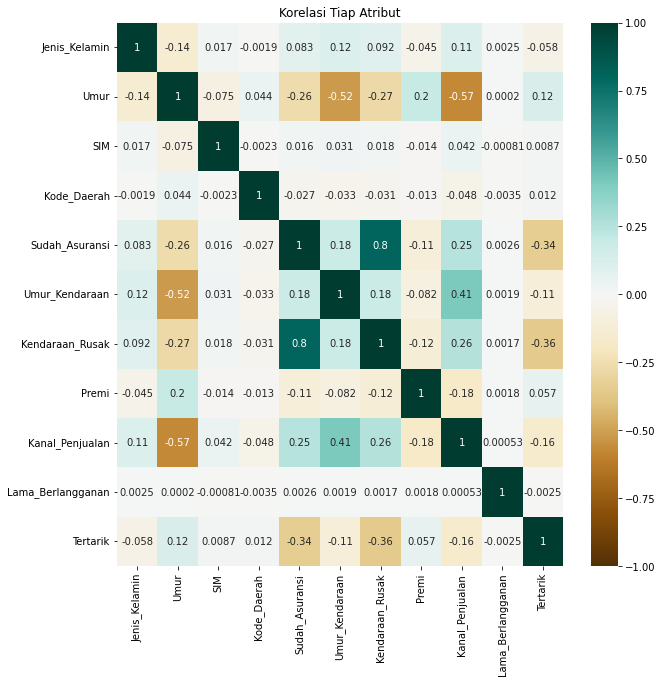

In [102]:
corr = df.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [103]:
# df = df[["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Premi", "Kanal_Penjualan", "Lama_Berlangganan", "Tertarik"]]
# df = df[["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]

## Memisahkan kolom tertarik

In [104]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

## Data Splitting

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print("Jumlah Data dan Kolom Train x: ", x_train.shape)
print("Jumlah Data dan Kolom Train y: ", y_train.shape)
print("Jumlah Data dan Kolom Test x: ", x_test.shape)
print("Jumlah Data dan Kolom Test y: ", y_test.shape)

Jumlah Data dan Kolom Train x:  (184552, 10)
Jumlah Data dan Kolom Train y:  (184552,)
Jumlah Data dan Kolom Test x:  (46138, 10)
Jumlah Data dan Kolom Test y:  (46138,)


## Naive Bayes Classifier

### Initiate Pre data

In [106]:
def initiatePredata(features, target):
  categories = np.unique(target)    
  mean = features.groupby(target).mean().to_numpy()  
  var = features.groupby(target).var().to_numpy()
    
  return categories, mean, var

### Calculate Prior 

In [107]:
def calcPrior(df, Y, classes):    
  priors = []
  for i in classes:
      prior = len(df[Y==i])/len(df)
      priors.append(prior)
  return priors

### Calculate Gaussian 

In [108]:
def calcGaussianDensity(class_idx, x, mean, var):
  mean = mean[class_idx]
  var = var[class_idx]
  numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
  denominator = np.sqrt(2 * np.pi * var)
  prob = numerator / denominator
  return prob

### Calculate Posterior

In [109]:
def calcPosterior(x, prior, categories, mean, var):
  posteriors = []
  # menghitung probabilitas posterior untuk tiap kolom
  for i in range(len(categories)):
      pr = np.log(prior[i]) 
      conditional = np.sum(np.log(calcGaussianDensity(i, x, mean, var))) 
      posterior = pr + conditional
      posteriors.append(posterior)
  return categories[np.argmax(posteriors)]

### Main Function

In [110]:
def naiveBayes(features, target, test_features):
  categories, mean, var = initiatePredata(features, target)  
  prior = calcPrior(features, target, categories)  
  predicts = []
  for feat in test_features.to_numpy():
    predicts.append(calcPosterior(feat, prior, categories, mean, var))
  return predicts

In [111]:
def accuracy(y_test, y_pred):
  accuracy = np.sum(y_test == y_pred) / len(y_test)
  return accuracy

## Train Model with Dataset Train

46138


<AxesSubplot:>

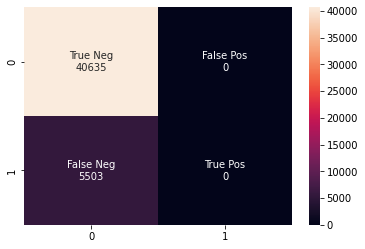

In [112]:
preds = naiveBayes(x_train, y_train, y_test)
print(len(preds))
conf_matrix = confusion_matrix(y_test, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [113]:
print(classification_report(y_test, preds))
accur = accuracy(y_test, preds)
accur

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     40635
           1       0.00      0.00      0.00      5503

    accuracy                           0.88     46138
   macro avg       0.44      0.50      0.47     46138
weighted avg       0.78      0.88      0.82     46138



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

0.8807273830681868

## Predict Data and Evaluate with Dataset Test

In [114]:
x_eval_test = df_test.drop("Tertarik", axis=1)
y_eval_test = df_test["Tertarik"]

47639


<AxesSubplot:>

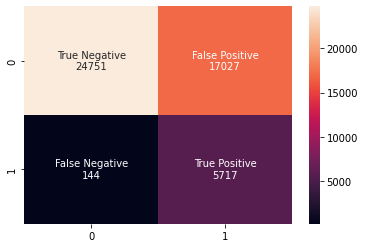

In [115]:
y_eval_pred = naiveBayes(x_train, y_train, x_eval_test)
print(len(y_eval_pred))
conf_matrix = confusion_matrix(y_eval_test, y_eval_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [116]:
print(classification_report(y_eval_test, y_eval_pred))


              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639

